In [ ]:
# Part 1 Data Acquisition

In [64]:
import pandas as pd

transactions_month_6 = pd.read_csv('transactions_month_6.csv')
transactions_month_7 = pd.read_csv('transactions_month_7.csv')
transactions_month_8 = pd.read_csv('transactions_month_8.csv')
transactions_month_9 = pd.read_csv('transactions_month_9.csv')
transactions_month_10 = pd.read_csv('transactions_month_10.csv')
transactions_month_11 = pd.read_csv('transactions_month_11.csv')
transactions_month_12 = pd.read_csv('transactions_month_12.csv')
fraud = pd.read_csv('fraud.csv')


In [65]:
all_transactions = [transactions_month_6, transactions_month_7, transactions_month_8,
                    transactions_month_9, transactions_month_10, transactions_month_11,
                    transactions_month_12]

merged_transactions = pd.concat(all_transactions, ignore_index=True)
print(merged_transactions.head())
print(fraud.head())

merged_data = pd.merge(merged_transactions, fraud, on='trans_id', how='left')
print("Merged DataFrame shape:", merged_data.shape)
merged_data.head()

   trans_id trans_date_trans_time        cc_num  \
0         0   2020-06-21 12:14:00  2.291160e+15   
1         1   2020-06-21 12:14:00  3.573030e+15   
2         2   2020-06-21 12:14:00  3.598220e+15   
3         3   2020-06-21 12:15:00  3.591920e+15   
4         4   2020-06-21 12:15:00  3.526830e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last  gender                       street  ...    zip      lat  \
0   Elliott    Male            351 Darlene Green  ...  29209  33.9659   
1  Williams  Female             3638 Marsh Union  ...  84002  40.3207   
2     Lopez  Female         9

,trans_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,Male,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,Female,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,Female,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,Male,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,Male,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [66]:
# Part 2 Data cleaning and Data inconsistance

In [67]:
initial_shape = merged_data.shape
df = merged_data.drop_duplicates()
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows. New shape: {df.shape}")

Removed 0 duplicate rows. New shape: (555719, 23)


In [68]:
from datetime import datetime

def calculate_age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = datetime.now().date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)

In [69]:
bins = [0, 18, 35, 60, 100]
labels = ['0-18', '18-35', '35-60', '60-100']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [70]:
df['full_name'] = df['first'] + ' ' + df['last']

In [72]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.upper()

In [73]:
df.head()

,trans_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,age_range,full_name
0,0,2020-06-21 12:14:00,2.291160e+15,FRAUD_KIRLIN AND SONS,PERSONAL_CARE,2.86,JEFF,ELLIOTT,MALE,351 DARLENE GREEN,...,MECHANICAL ENGINEER,19/03/1968,2DA90C7D74BD46A0CAF3777415B3EBD3,1371816865,33.986391,-81.200714,0,56,35-60,JEFF ELLIOTT
1,1,2020-06-21 12:14:00,3.573030e+15,FRAUD_SPORER-KEEBLER,PERSONAL_CARE,29.84,JOANNE,WILLIAMS,FEMALE,3638 MARSH UNION,...,"SALES PROFESSIONAL, IT",17/01/1990,324CC204407E99F51B0D6CA0055005E7,1371816873,39.450498,-109.960431,0,35,35-60,JOANNE WILLIAMS
2,2,2020-06-21 12:14:00,3.598220e+15,"FRAUD_SWANIAWSKI, NITZSCHE AND WELCH",HEALTH_FITNESS,41.28,ASHLEY,LOPEZ,FEMALE,9333 VALENTINE POINT,...,"LIBRARIAN, PUBLIC",21/10/1970,C81755DBBBEA9D5C77F094348A7579BE,1371816893,40.495810,-74.196111,0,54,35-60,ASHLEY LOPEZ
3,3,2020-06-21 12:15:00,3.591920e+15,FRAUD_HALEY GROUP,MISC_POS,60.05,BRIAN,WILLIAMS,MALE,32941 KRYSTAL MILL APT. 552,...,SET DESIGNER,25/07/1987,2159175B9EFE66DC301F149D3D5ABF8C,1371816915,28.812398,-80.883061,0,37,35-60,BRIAN WILLIAMS
4,4,2020-06-21 12:15:00,3.526830e+15,FRAUD_JOHNSTON-CASPER,TRAVEL,3.19,NATHAN,MASSEY,MALE,5783 EVAN ROADS APT. 465,...,FURNITURE DESIGNER,06/07/1955,57FF021BD3F328F8738BB535C302A31B,1371816917,44.959148,-85.884734,0,69,60-100,NATHAN MASSEY


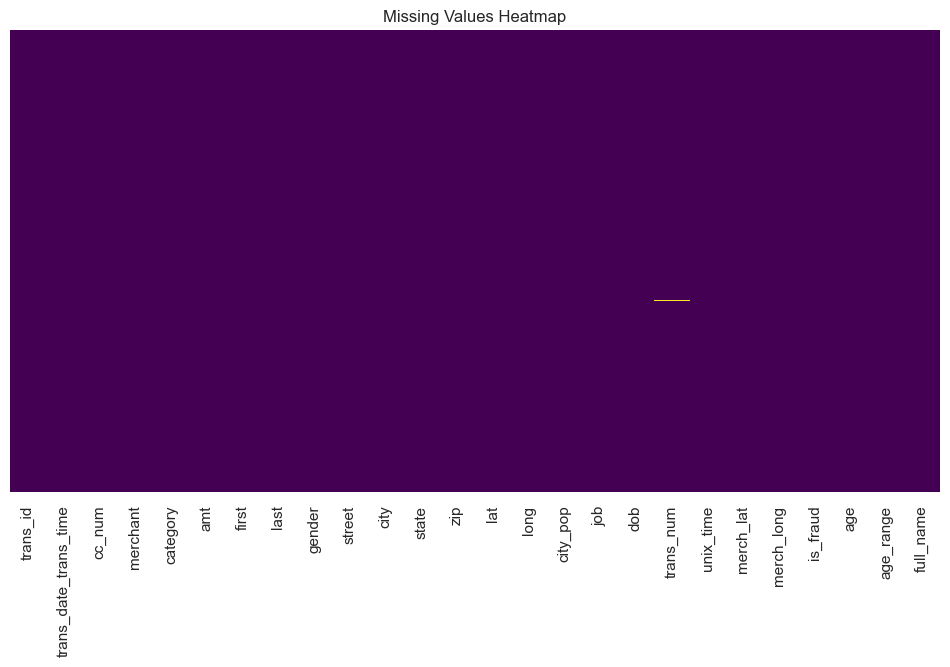

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [75]:
df.isnull().sum()

trans_id                   0
trans_date_trans_time      0
cc_num                     0
merchant                   9
category                   6
amt                        0
first                      0
last                      21
gender                     0
street                    14
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                       17
dob                        0
trans_num                 28
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
age_range                199
full_name                 21
dtype: int64

In [76]:
import numpy as np
from sklearn.impute import KNNImputer

num_cols = df.select_dtypes(include=[np.number]).columns
print(df[num_cols].isnull().sum())

#imputer = KNNImputer(n_neighbors=5)
#df[num_cols] = imputer.fit_transform(df[num_cols])
#print("Missing values after KNN imputation (numerical):")
#print(df[num_cols].isnull().sum())
# For categorical columns, we can impute using the mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mode()[0])

trans_id      0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
age           0
dtype: int64


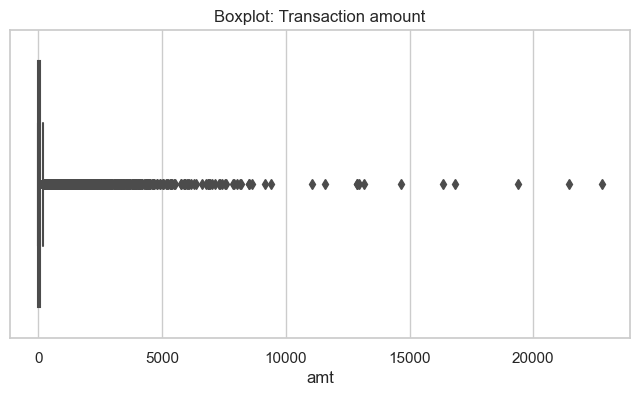

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['amt'])
plt.title("Boxplot: Transaction amount")
plt.show()

In [78]:
from scipy.stats.mstats import winsorize

def winsorize_series(s, limits=[0.05, 0.05]):
    return winsorize(s, limits=limits)

# Apply winsorization on 'amt' column
df['amt_w'] = winsorize_series(df['amt'], limits=[0.05, 0.05])
df['amt'] = df['amt_w']  # Replace the original 'amt' column with the winsorized values
df.drop(columns=['amt_w'], inplace=True)  # Remove the temporary 'amt_w' column

In [79]:
# Part 3 Exploratory Data Analysis (EDA)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
sns.set(style="whitegrid")

# Summary Statistics
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
            trans_id        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      57.643238   48842.628015   
std    160422.401459  1.309837e+18      52.791829   26855.283328   
min         0.000000  6.041621e+10       2.430000    1257.000000   
25%    138929.500000  1.800430e+14       9.630000   26292.000000   
50%    277859.000000  3.521420e+15      47.290000   48174.000000   
75%    416788.500000  4.635330e+15      83.010000   72011.000000   
max    555718.000000  4.992350e+18     193.060000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%       

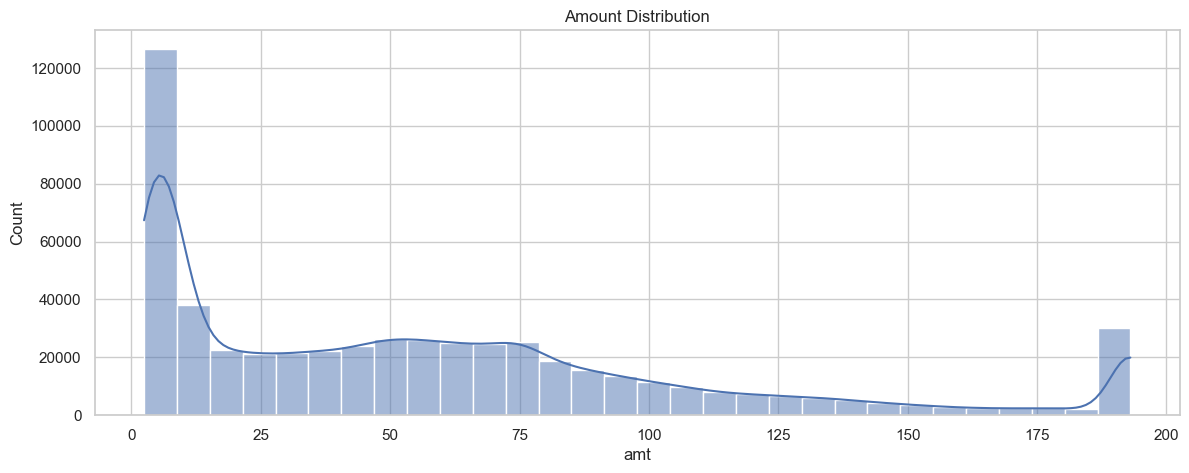

In [82]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.histplot(df['amt'].dropna(), bins=30, ax=ax, kde=True)
ax.set_title("Amount Distribution")

plt.show()

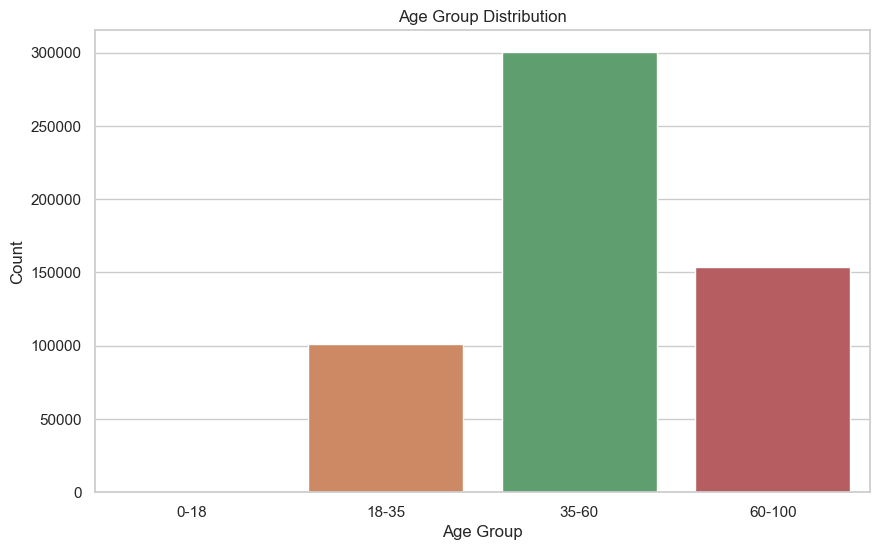

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df, order=labels)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

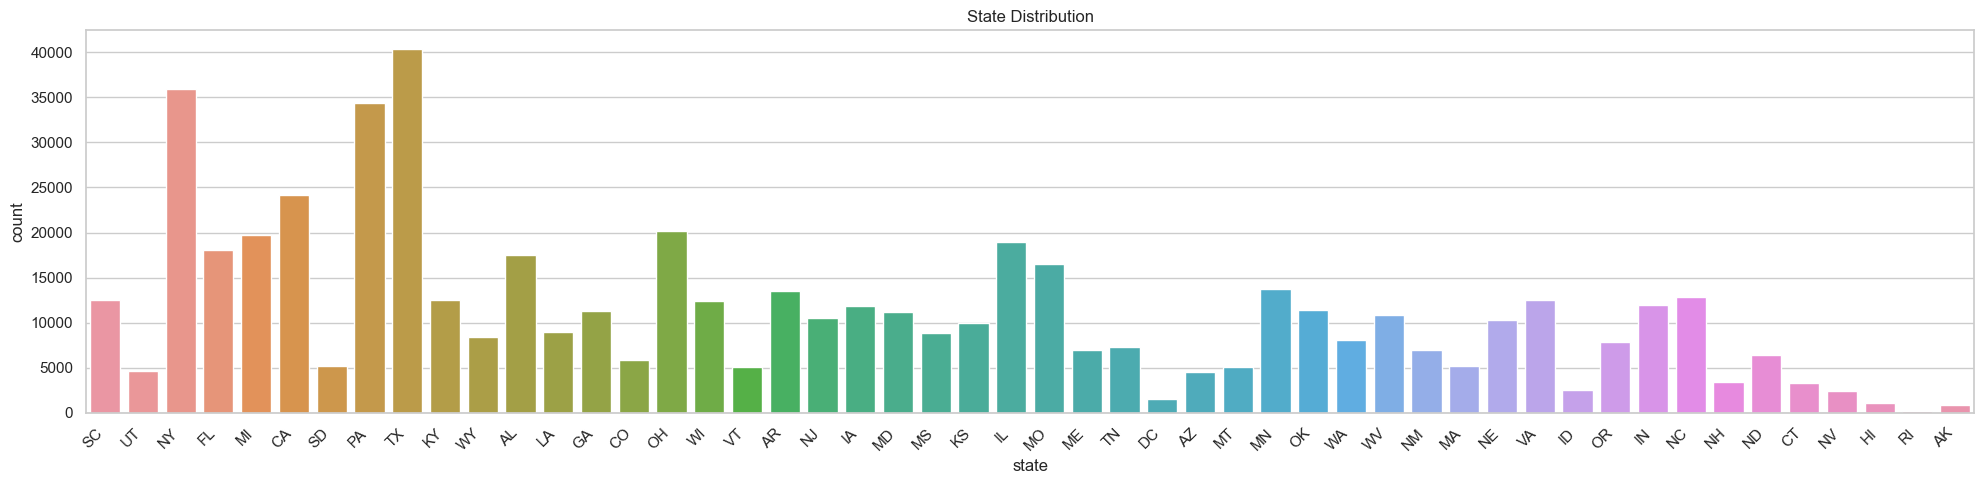

In [88]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='state', data=df, ax=ax)
ax.set_title("State Distribution")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

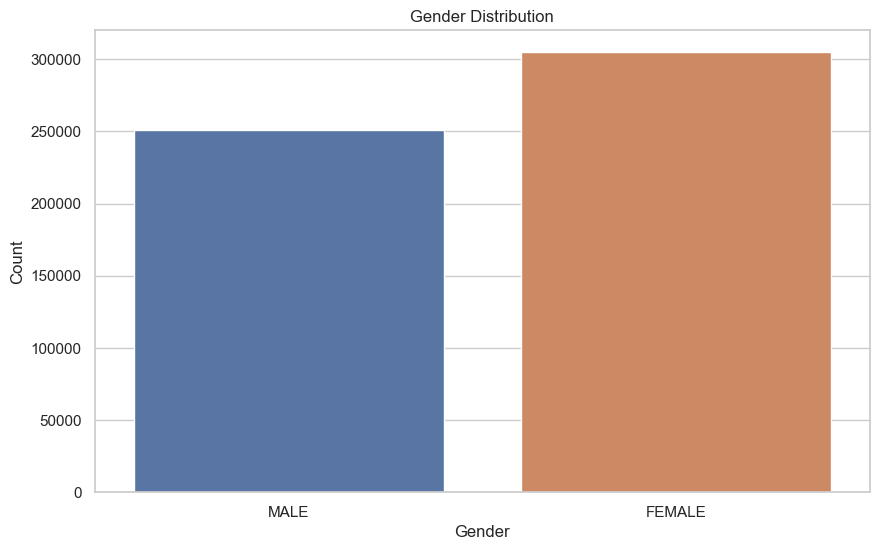

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

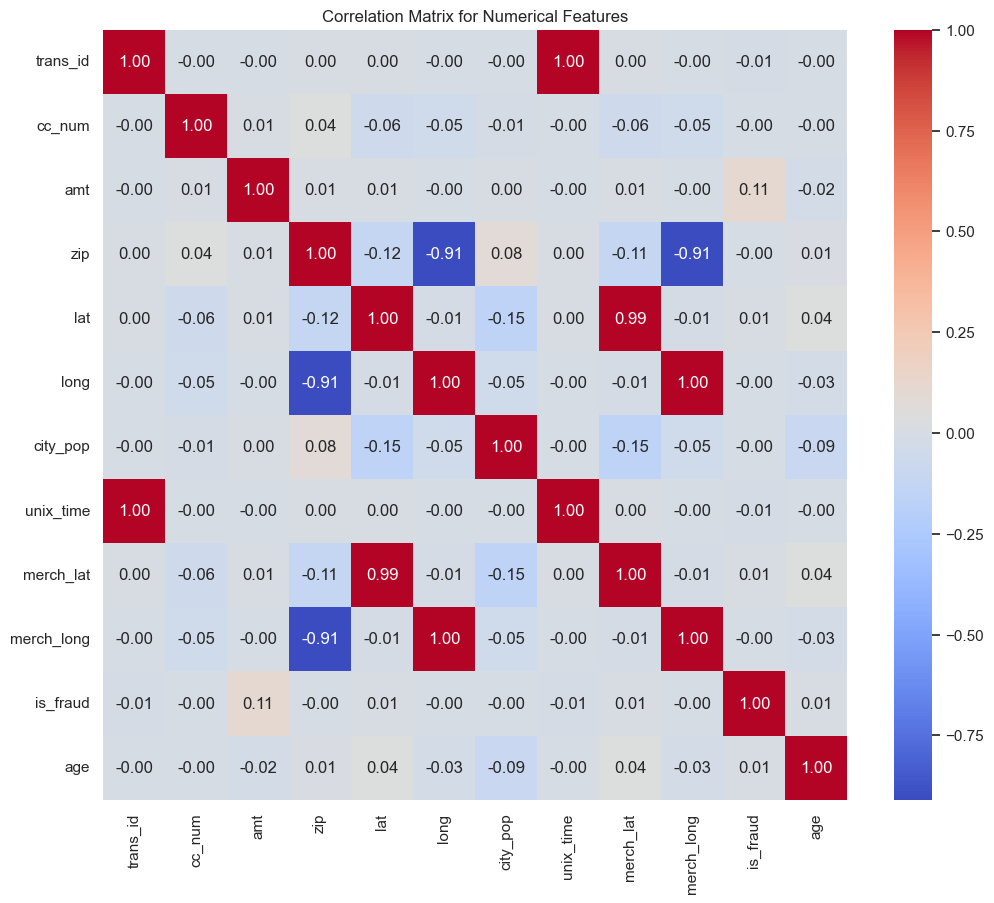

In [95]:
# Correlation Matrix
# Select numerical columns only
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()